In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Multivariate/pHA')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

## Data Format

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Turag/Python/DL Lab/Multivariate/pHA/data/LocationA.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempA,pHA,ECA,DOA,BODA,TNA
0,21.50,7.73,1748,2.55,27.96,1.28
1,21.21,7.82,1765,2.60,27.90,1.08
2,21.21,7.73,1769,2.59,27.88,1.17
3,21.26,7.82,1776,2.63,27.66,1.15
4,21.09,7.76,1822,2.60,27.71,1.22


In [ ]:
target_column = "pHA"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [ ]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [ ]:
X[0], y[0]

(array([2.150e+01, 1.748e+03, 2.550e+00, 2.796e+01, 1.280e+00, 2.121e+01,
        1.765e+03, 2.600e+00, 2.790e+01, 1.080e+00, 2.121e+01, 1.769e+03,
        2.590e+00, 2.788e+01, 1.170e+00]),
 7.82)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [ ]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [ ]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [ ]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [ ]:
epochs = 50

# General Model

### CNN

In [ ]:
x_train = xt.copy()

Epoch 1/50
8/8 [==============================] - 2s 204ms/step - loss: 5851.0186 - root_mean_squared_error: 76.4920 - val_loss: 173.4905 - val_root_mean_squared_error: 13.1716
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 393.7343 - root_mean_squared_error: 19.8427 - val_loss: 1177.9972 - val_root_mean_squared_error: 34.3220
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 959.4144 - root_mean_squared_error: 30.9744 - val_loss: 221.2873 - val_root_mean_squared_error: 14.8757
Epoch 4/50
8/8 [==============================] - 1s 110ms/step - loss: 75.2776 - root_mean_squared_error: 8.6763 - val_loss: 162.1782 - val_root_mean_squared_error: 12.7349
Epoch 5/50
8/8 [==============================] - 1s 109ms/step - loss: 199.6318 - root_mean_squared_error: 14.1291 - val_loss: 83.8167 - val_root_mean_squared_error: 9.1551
Epoch 6/50
8/8 [==============================] - 1s 114ms/step - loss: 31.4419 - root_mean_squared_error: 5.6073 - val_loss

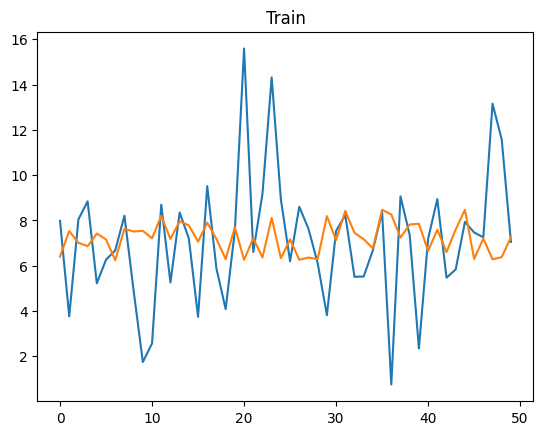

2/2 [==============================] - 0s 6ms/step


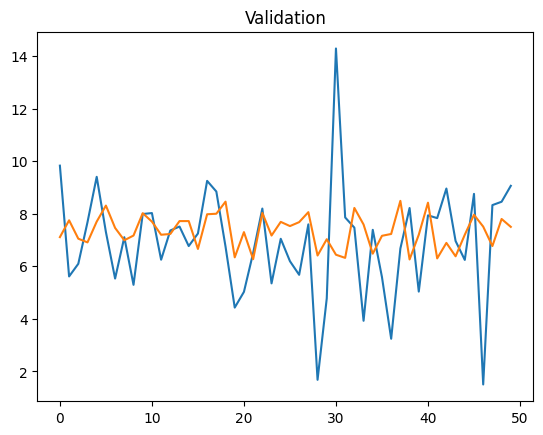

3/3 [==============================] - 0s 4ms/step


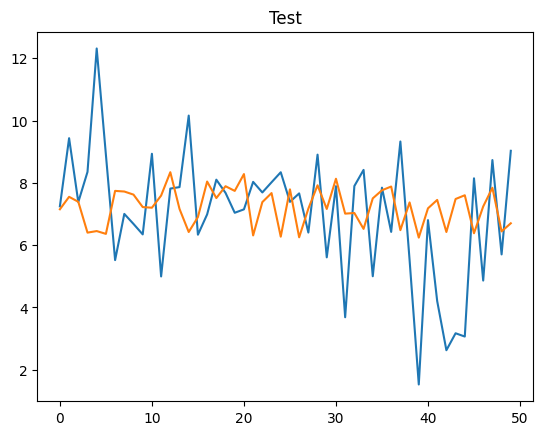

3/3 [==============================] - 0s 4ms/step


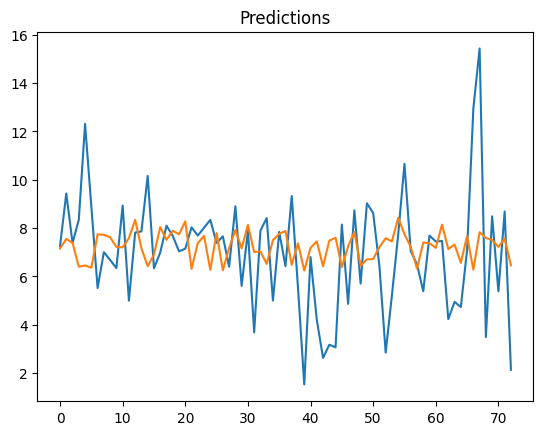

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
8/8 [==============================] - 8s 679ms/step - loss: 44.0752 - root_mean_squared_error: 6.6389 - val_loss: 41.3827 - val_root_mean_squared_error: 6.4329
Epoch 2/50
8/8 [==============================] - 4s 583ms/step - loss: 41.1739 - root_mean_squared_error: 6.4167 - val_loss: 38.5912 - val_root_mean_squared_error: 6.2122
Epoch 3/50
8/8 [==============================] - 5s 653ms/step - loss: 38.3818 - root_mean_squared_error: 6.1953 - val_loss: 35.8942 - val_root_mean_squared_error: 5.9912
Epoch 4/50
8/8 [==============================] - 4s 610ms/step - loss: 35.6906 - root_mean_squared_error: 5.9742 - val_loss: 33.3023 - val_root_mean_squared_error: 5.7708
Epoch 5/50
8/8 [==============================] - 4s 517ms/step - loss: 33.1106 - root_mean_squared_error: 5.7542 - val_loss: 30.7996 - val_root_mean_squared_error: 5.5497
Epoch 6/50
8/8 [==============================] - 5s 709ms/step - loss: 30.6103 - root_mean_squared_error: 5.5327 - val_loss: 28.4034 - val_

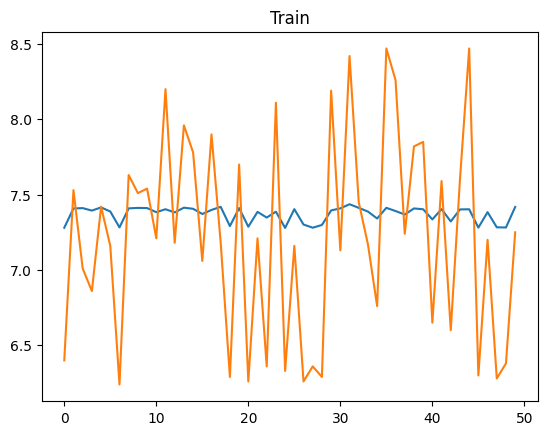

2/2 [==============================] - 1s 11ms/step


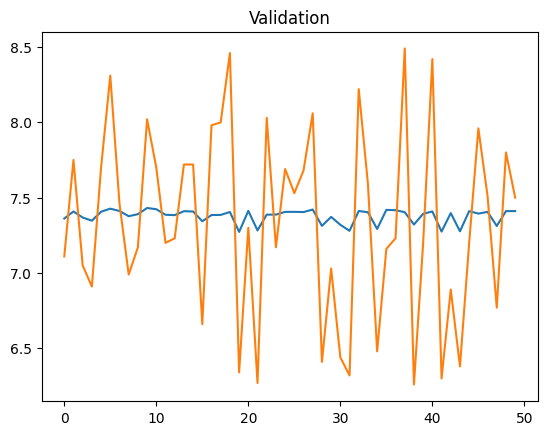

3/3 [==============================] - 0s 10ms/step


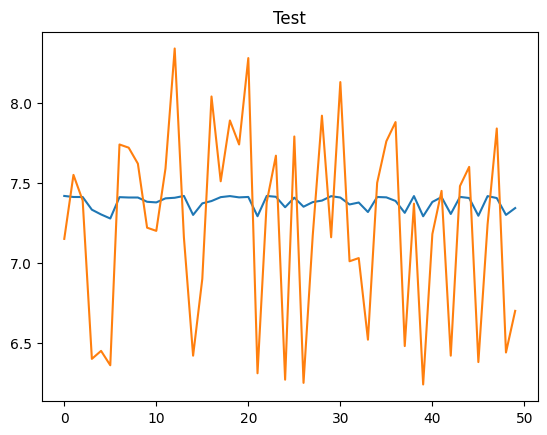

3/3 [==============================] - 0s 6ms/step


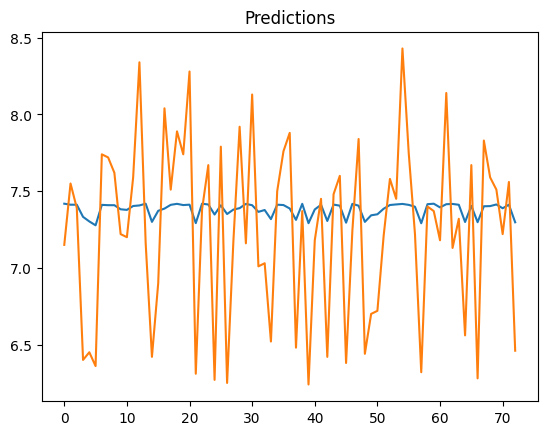

In [ ]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
8/8 [==============================] - 8s 729ms/step - loss: 53.0441 - root_mean_squared_error: 7.2831 - val_loss: 51.0827 - val_root_mean_squared_error: 7.1472
Epoch 2/50
8/8 [==============================] - 6s 808ms/step - loss: 51.3937 - root_mean_squared_error: 7.1689 - val_loss: 49.6715 - val_root_mean_squared_error: 7.0478
Epoch 3/50
8/8 [==============================] - 5s 675ms/step - loss: 50.0318 - root_mean_squared_error: 7.0733 - val_loss: 48.3690 - val_root_mean_squared_error: 6.9548
Epoch 4/50
8/8 [==============================] - 4s 622ms/step - loss: 48.7470 - root_mean_squared_error: 6.9819 - val_loss: 47.1334 - val_root_mean_squared_error: 6.8654
Epoch 5/50
8/8 [==============================] - 6s 791ms/step - loss: 47.5165 - root_mean_squared_error: 6.8932 - val_loss: 45.9356 - val_root_mean_squared_error: 6.7776
Epoch 6/50
8/8 [==============================] - 5s 757ms/step - loss: 46.3139 - root_mean_squared_error: 6.8054 - val_loss: 44.7451 - val_

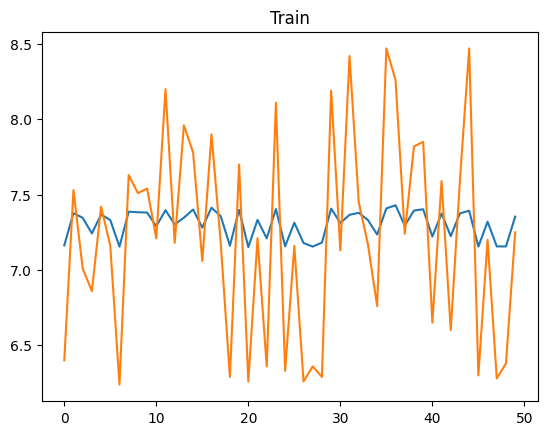

2/2 [==============================] - 0s 9ms/step


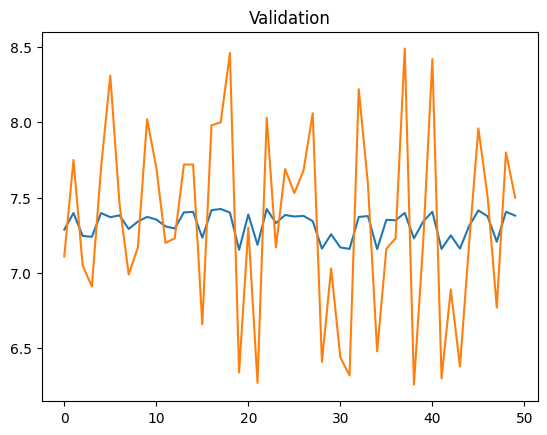

3/3 [==============================] - 0s 6ms/step


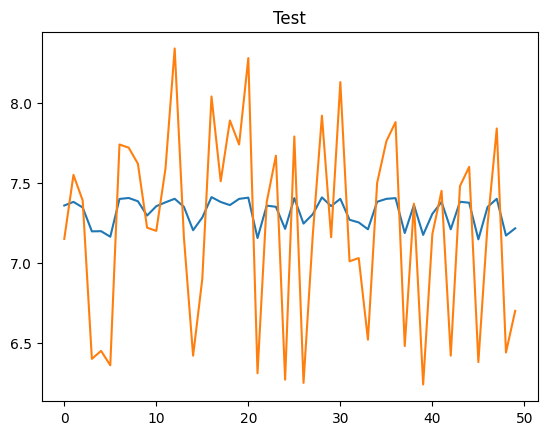

3/3 [==============================] - 0s 5ms/step


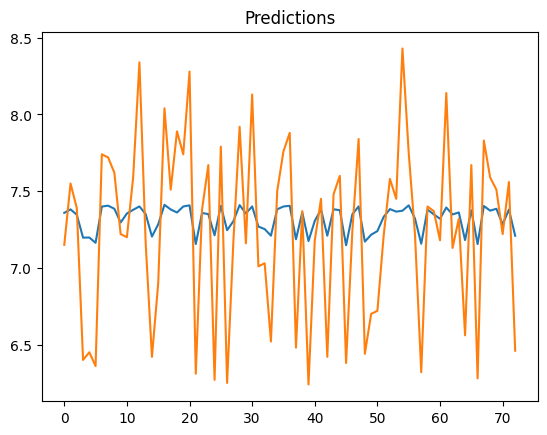

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
8/8 [==============================] - 3s 338ms/step - loss: 44.2460 - root_mean_squared_error: 6.6518 - val_loss: 41.0788 - val_root_mean_squared_error: 6.4093
Epoch 2/50
8/8 [==============================] - 2s 311ms/step - loss: 39.8541 - root_mean_squared_error: 6.3130 - val_loss: 36.9787 - val_root_mean_squared_error: 6.0810
Epoch 3/50
8/8 [==============================] - 2s 224ms/step - loss: 35.8795 - root_mean_squared_error: 5.9899 - val_loss: 33.2882 - val_root_mean_squared_error: 5.7696
Epoch 4/50
8/8 [==============================] - 2s 311ms/step - loss: 32.2850 - root_mean_squared_error: 5.6820 - val_loss: 29.9102 - val_root_mean_squared_error: 5.4690
Epoch 5/50
8/8 [==============================] - 2s 215ms/step - loss: 28.9912 - root_mean_squared_error: 5.3843 - val_loss: 26.8215 - val_root_mean_squared_error: 5.1790
Epoch 6/50
8/8 [==============================] - 2s 220ms/step - loss: 25.9757 - root_mean_squared_error: 5.0966 - val_loss: 24.0119 - val_

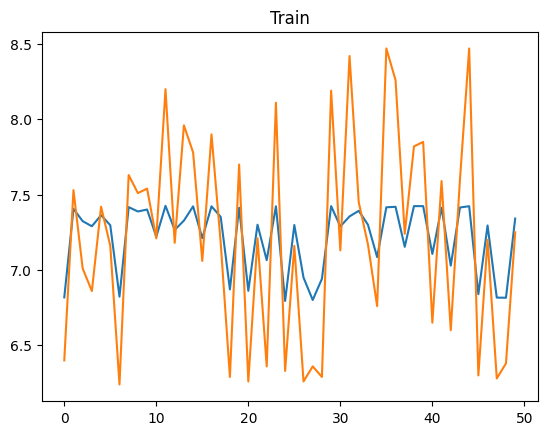

2/2 [==============================] - 0s 7ms/step


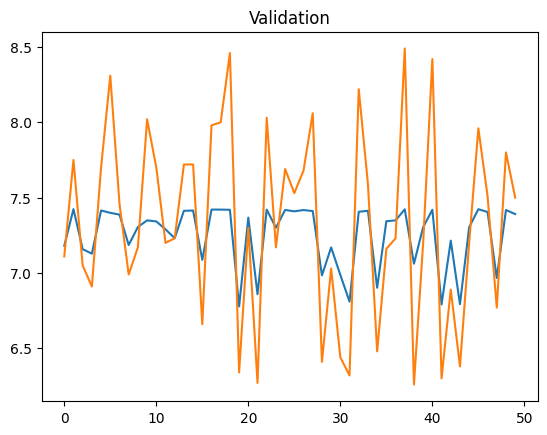

3/3 [==============================] - 0s 5ms/step


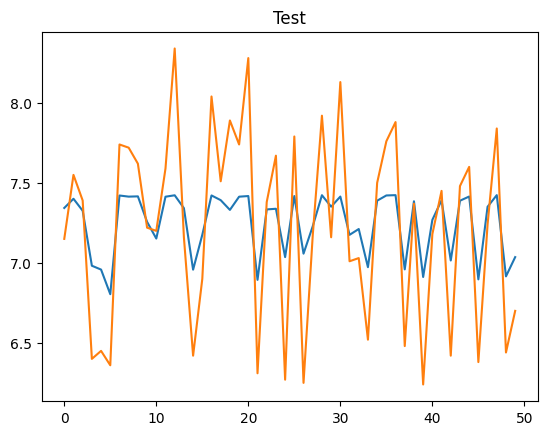

3/3 [==============================] - 0s 5ms/step


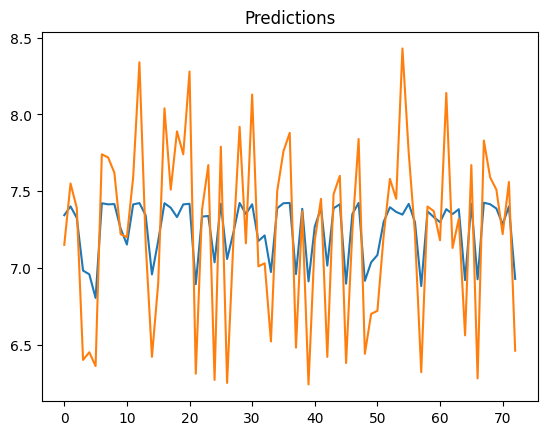

In [ ]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [ ]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
8/8 [==============================] - 2s 175ms/step - loss: 85.9260 - root_mean_squared_error: 9.2696 - val_loss: 54.6893 - val_root_mean_squared_error: 7.3952
Epoch 2/50
8/8 [==============================] - 1s 143ms/step - loss: 55.1368 - root_mean_squared_error: 7.4254 - val_loss: 54.6086 - val_root_mean_squared_error: 7.3898
Epoch 3/50
8/8 [==============================] - 1s 153ms/step - loss: 55.1258 - root_mean_squared_error: 7.4247 - val_loss: 54.5665 - val_root_mean_squared_error: 7.3869
Epoch 4/50
8/8 [==============================] - 1s 201ms/step - loss: 55.1146 - root_mean_squared_error: 7.4239 - val_loss: 54.5408 - val_root_mean_squared_error: 7.3852
Epoch 5/50
8/8 [==============================] - 1s 99ms/step - loss: 55.1034 - root_mean_squared_error: 7.4232 - val_loss: 54.5228 - val_root_mean_squared_error: 7.3840
Epoch 6/50
8/8 [==============================] - 1s 102ms/step - loss: 55.0920 - root_mean_squared_error: 7.4224 - val_loss: 54.5083 - val_r

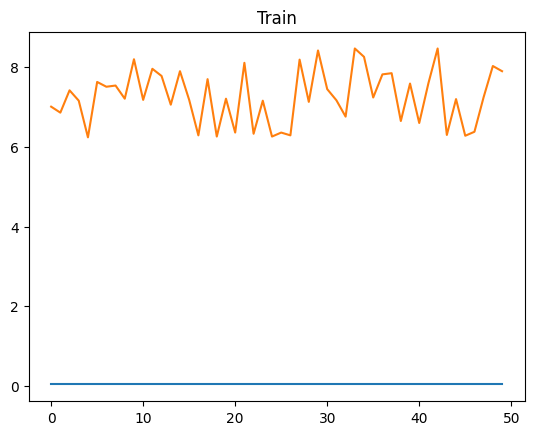

2/2 [==============================] - 0s 5ms/step


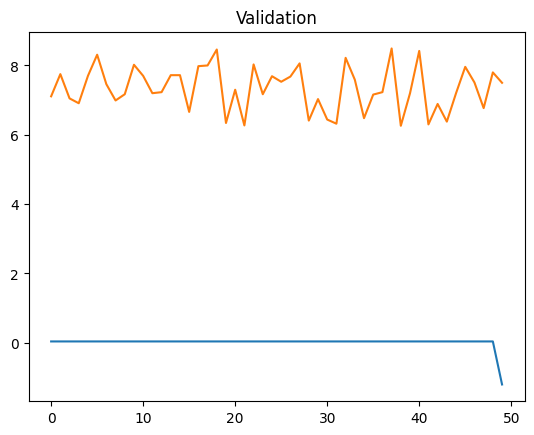

3/3 [==============================] - 0s 7ms/step


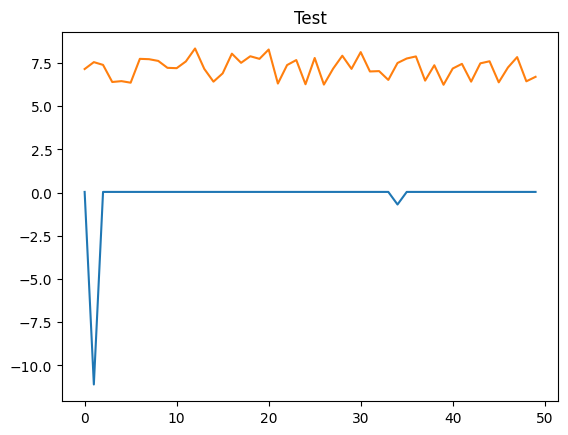

3/3 [==============================] - 0s 5ms/step


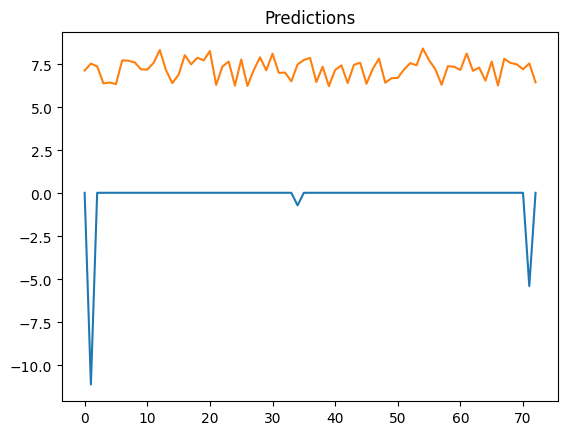

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
8/8 [==============================] - 6s 532ms/step - loss: 60.0696 - root_mean_squared_error: 7.7505 - val_loss: 57.3876 - val_root_mean_squared_error: 7.5755
Epoch 2/50
8/8 [==============================] - 4s 555ms/step - loss: 57.3215 - root_mean_squared_error: 7.5711 - val_loss: 54.7404 - val_root_mean_squared_error: 7.3987
Epoch 3/50
8/8 [==============================] - 4s 637ms/step - loss: 54.6699 - root_mean_squared_error: 7.3939 - val_loss: 52.1857 - val_root_mean_squared_error: 7.2240
Epoch 4/50
8/8 [==============================] - 3s 469ms/step - loss: 52.1182 - root_mean_squared_error: 7.2193 - val_loss: 49.7093 - val_root_mean_squared_error: 7.0505
Epoch 5/50
8/8 [==============================] - 3s 467ms/step - loss: 49.6318 - root_mean_squared_error: 7.0450 - val_loss: 47.3065 - val_root_mean_squared_error: 6.8780
Epoch 6/50
8/8 [==============================] - 5s 704ms/step - loss: 47.2236 - root_mean_squared_error: 6.8719 - val_loss: 44.9693 - val_

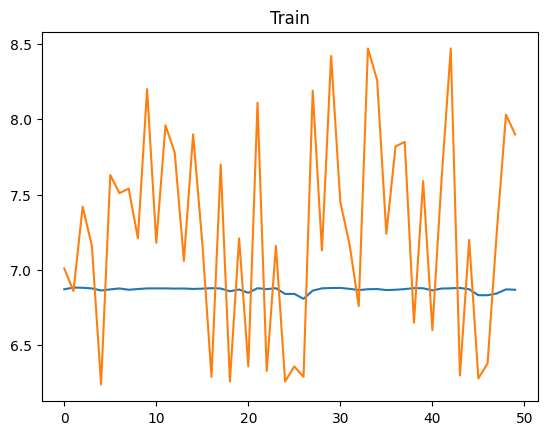

2/2 [==============================] - 1s 8ms/step


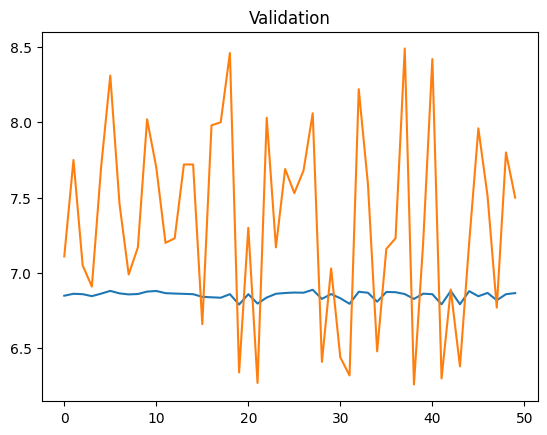

3/3 [==============================] - 0s 6ms/step


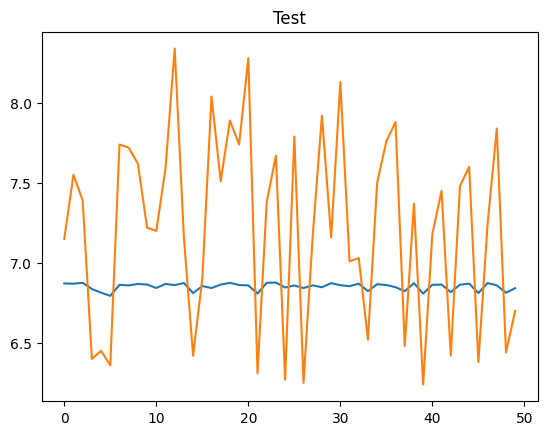

3/3 [==============================] - 0s 8ms/step


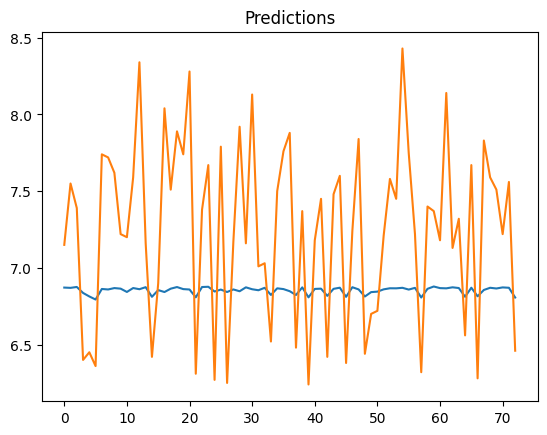

In [ ]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
8/8 [==============================] - 8s 771ms/step - loss: 51.2463 - root_mean_squared_error: 7.1587 - val_loss: 49.8986 - val_root_mean_squared_error: 7.0639
Epoch 2/50
8/8 [==============================] - 4s 525ms/step - loss: 50.5222 - root_mean_squared_error: 7.1079 - val_loss: 49.1884 - val_root_mean_squared_error: 7.0134
Epoch 3/50
8/8 [==============================] - 4s 609ms/step - loss: 49.8043 - root_mean_squared_error: 7.0572 - val_loss: 48.4815 - val_root_mean_squared_error: 6.9629
Epoch 4/50
8/8 [==============================] - 5s 686ms/step - loss: 49.0862 - root_mean_squared_error: 7.0062 - val_loss: 47.7690 - val_root_mean_squared_error: 6.9115
Epoch 5/50
8/8 [==============================] - 4s 527ms/step - loss: 48.3565 - root_mean_squared_error: 6.9539 - val_loss: 47.0368 - val_root_mean_squared_error: 6.8583
Epoch 6/50
8/8 [==============================] - 4s 620ms/step - loss: 47.6107 - root_mean_squared_error: 6.9000 - val_loss: 46.3074 - val_

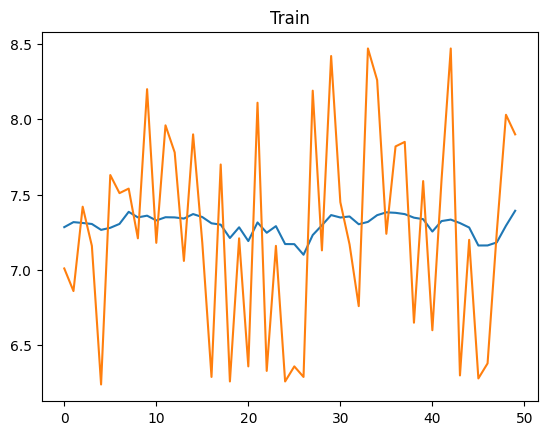

2/2 [==============================] - 1s 11ms/step


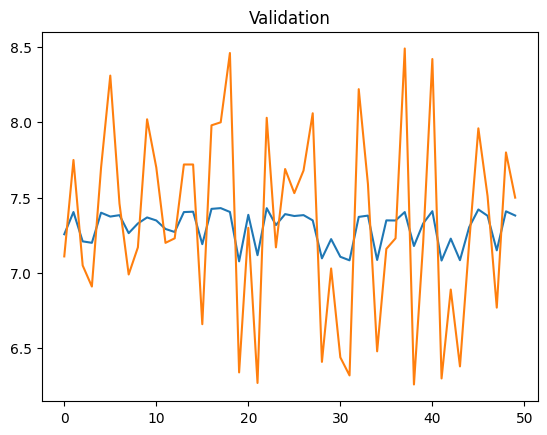

3/3 [==============================] - 0s 6ms/step


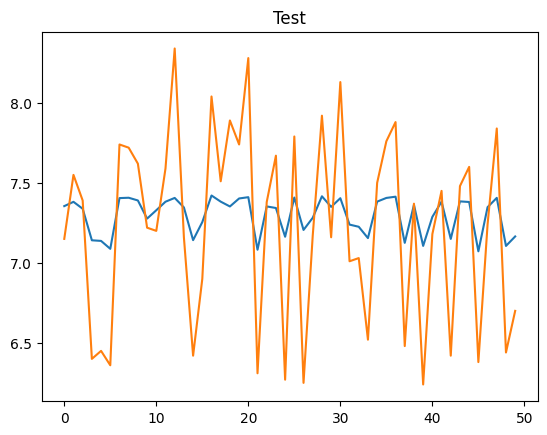

3/3 [==============================] - 0s 7ms/step


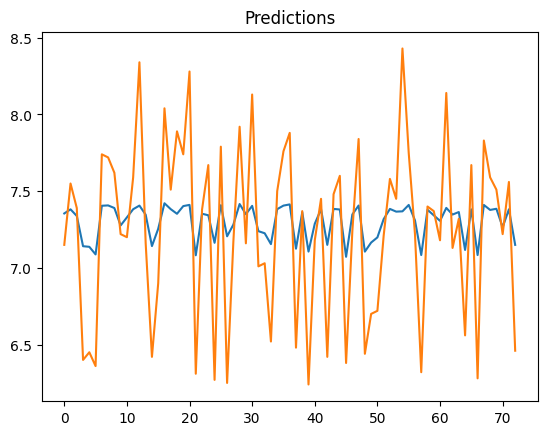

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - 4s 261ms/step - loss: 57.5628 - root_mean_squared_error: 7.5870 - val_loss: 53.4462 - val_root_mean_squared_error: 7.3107
Epoch 2/50
8/8 [==============================] - 2s 223ms/step - loss: 52.4730 - root_mean_squared_error: 7.2438 - val_loss: 48.6181 - val_root_mean_squared_error: 6.9727
Epoch 3/50
8/8 [==============================] - 2s 229ms/step - loss: 47.6574 - root_mean_squared_error: 6.9034 - val_loss: 44.0536 - val_root_mean_squared_error: 6.6373
Epoch 4/50
8/8 [==============================] - 2s 348ms/step - loss: 43.1052 - root_mean_squared_error: 6.5655 - val_loss: 39.7779 - val_root_mean_squared_error: 6.3070
Epoch 5/50
8/8 [==============================] - 2s 233ms/step - loss: 38.8548 - root_mean_squared_error: 6.2334 - val_loss: 35.7809 - val_root_mean_squared_error: 5.9817
Epoch 6/50
8/8 [==============================] - 2s 291ms/step - loss: 34.8799 - root_mean_squared_error: 5.9059 - val_loss: 32.0768 - val_

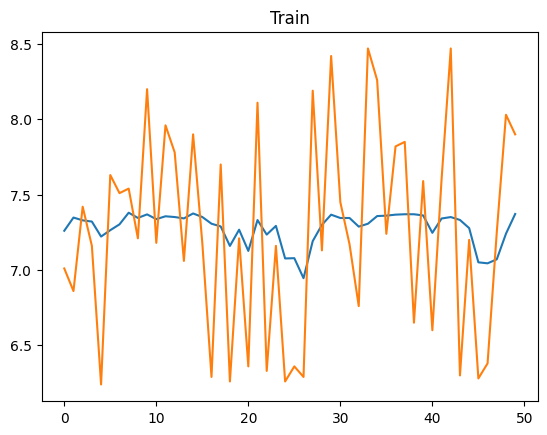

2/2 [==============================] - 0s 8ms/step


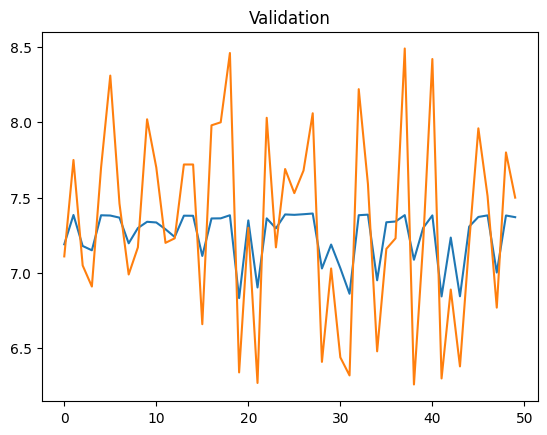

3/3 [==============================] - 0s 5ms/step


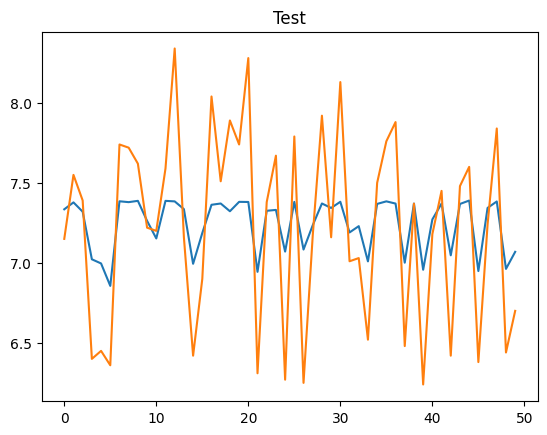

3/3 [==============================] - 0s 5ms/step


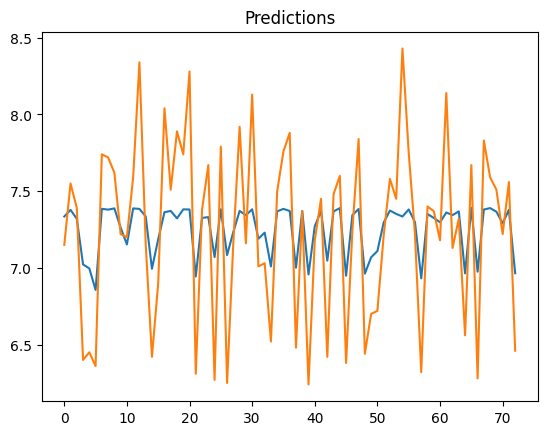

In [ ]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
8/8 [==============================] - 2s 179ms/step - loss: 12431.2441 - root_mean_squared_error: 111.4955 - val_loss: 708.8980 - val_root_mean_squared_error: 26.6251
Epoch 2/50
8/8 [==============================] - 1s 153ms/step - loss: 9218.0410 - root_mean_squared_error: 96.0106 - val_loss: 237.1730 - val_root_mean_squared_error: 15.4004
Epoch 3/50
8/8 [==============================] - 1s 156ms/step - loss: 6639.8003 - root_mean_squared_error: 81.4850 - val_loss: 115.2473 - val_root_mean_squared_error: 10.7353
Epoch 4/50
8/8 [==============================] - 1s 149ms/step - loss: 6361.1318 - root_mean_squared_error: 79.7567 - val_loss: 6.6297 - val_root_mean_squared_error: 2.5748
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 4220.0386 - root_mean_squared_error: 64.9618 - val_loss: 239.1248 - val_root_mean_squared_error: 15.4637
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 4170.8540 - root_mean_squared_error: 64.5821 -

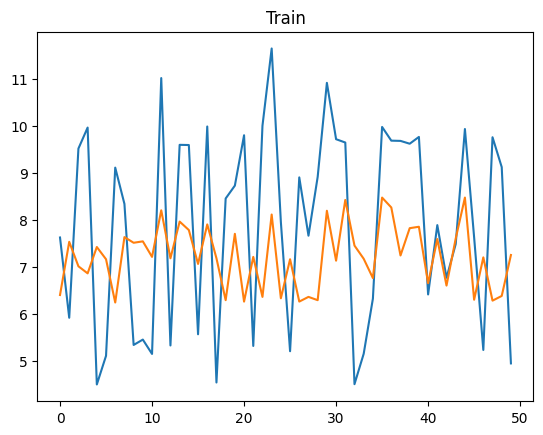

2/2 [==============================] - 0s 5ms/step


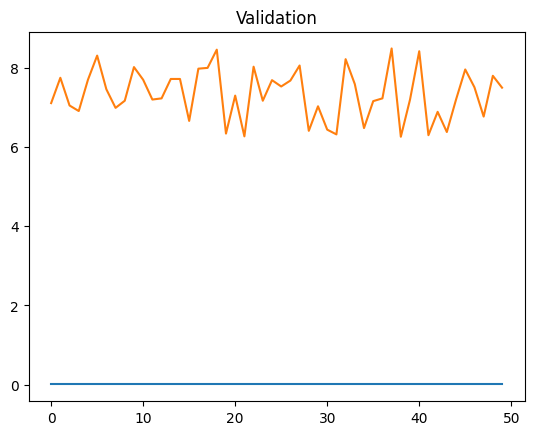

3/3 [==============================] - 0s 5ms/step


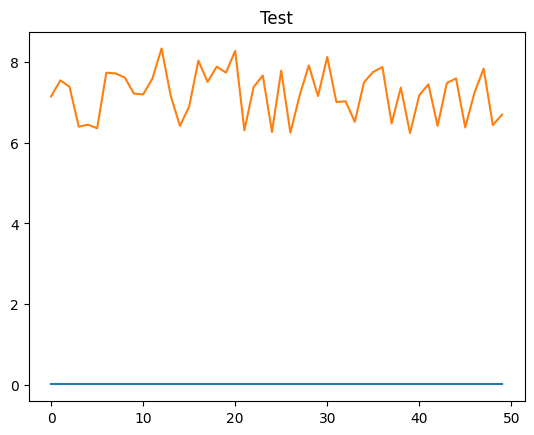

3/3 [==============================] - 0s 4ms/step


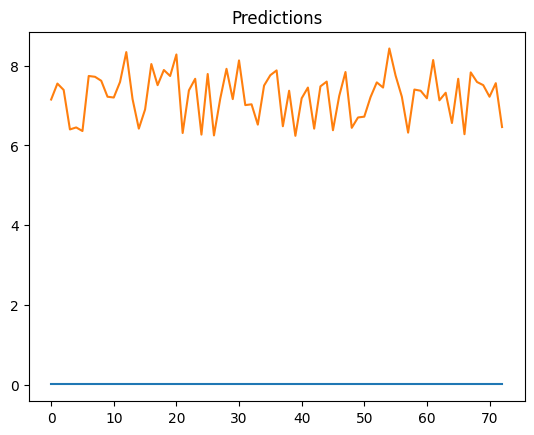

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_cnn_mse

52.821140805837054

### GRU

Epoch 1/50
8/8 [==============================] - 7s 537ms/step - loss: 62.5386 - root_mean_squared_error: 7.9081 - val_loss: 59.1144 - val_root_mean_squared_error: 7.6886
Epoch 2/50
8/8 [==============================] - 5s 646ms/step - loss: 58.8539 - root_mean_squared_error: 7.6716 - val_loss: 55.5658 - val_root_mean_squared_error: 7.4542
Epoch 3/50
8/8 [==============================] - 4s 511ms/step - loss: 54.3347 - root_mean_squared_error: 7.3712 - val_loss: 52.1221 - val_root_mean_squared_error: 7.2196
Epoch 4/50
8/8 [==============================] - 4s 607ms/step - loss: 51.8610 - root_mean_squared_error: 7.2015 - val_loss: 48.7646 - val_root_mean_squared_error: 6.9832
Epoch 5/50
8/8 [==============================] - 4s 556ms/step - loss: 48.4551 - root_mean_squared_error: 6.9610 - val_loss: 45.4813 - val_root_mean_squared_error: 6.7440
Epoch 6/50
8/8 [==============================] - 4s 595ms/step - loss: 44.7572 - root_mean_squared_error: 6.6901 - val_loss: 42.2564 - val_

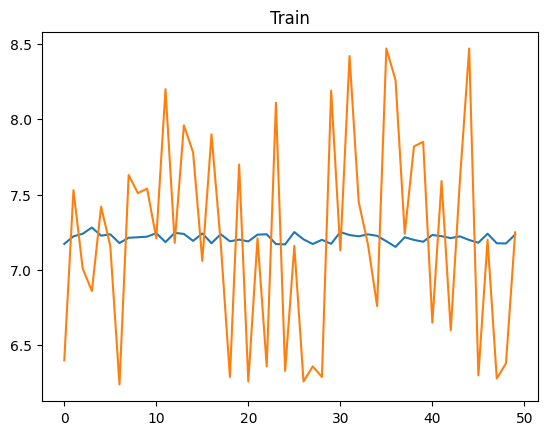

2/2 [==============================] - 1s 11ms/step


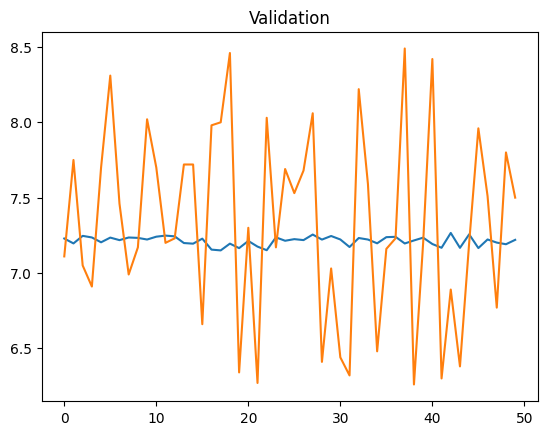

3/3 [==============================] - 0s 10ms/step


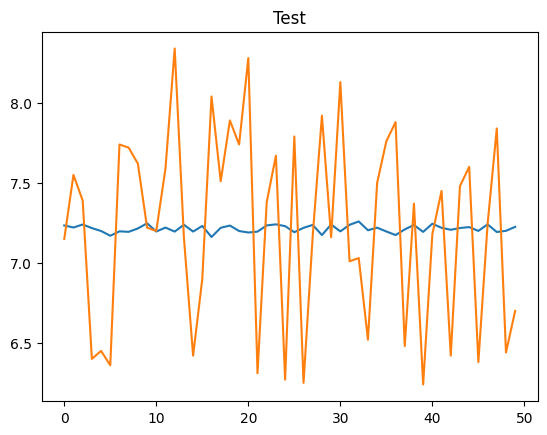

3/3 [==============================] - 0s 9ms/step


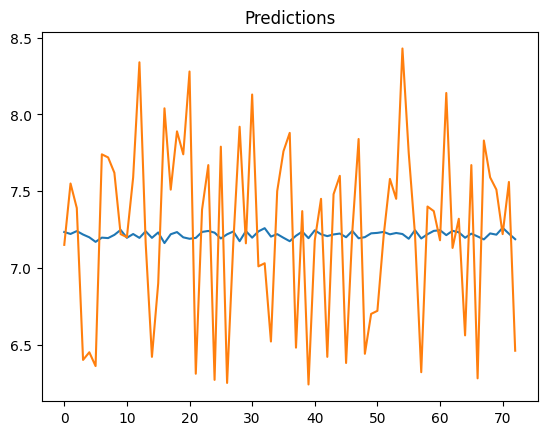

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_gru_mse

0.33891253368108104

### LSTM

Epoch 1/50
8/8 [==============================] - 7s 685ms/step - loss: 57.9886 - root_mean_squared_error: 7.6150 - val_loss: 56.0241 - val_root_mean_squared_error: 7.4849
Epoch 2/50
8/8 [==============================] - 6s 890ms/step - loss: 57.3058 - root_mean_squared_error: 7.5701 - val_loss: 55.2080 - val_root_mean_squared_error: 7.4302
Epoch 3/50
8/8 [==============================] - 4s 567ms/step - loss: 56.4998 - root_mean_squared_error: 7.5166 - val_loss: 54.7400 - val_root_mean_squared_error: 7.3987
Epoch 4/50
8/8 [==============================] - 4s 592ms/step - loss: 56.1680 - root_mean_squared_error: 7.4945 - val_loss: 54.5085 - val_root_mean_squared_error: 7.3830
Epoch 5/50
8/8 [==============================] - 6s 847ms/step - loss: 55.7270 - root_mean_squared_error: 7.4651 - val_loss: 54.4246 - val_root_mean_squared_error: 7.3773
Epoch 6/50
8/8 [==============================] - 4s 593ms/step - loss: 55.1239 - root_mean_squared_error: 7.4245 - val_loss: 54.1848 - val_

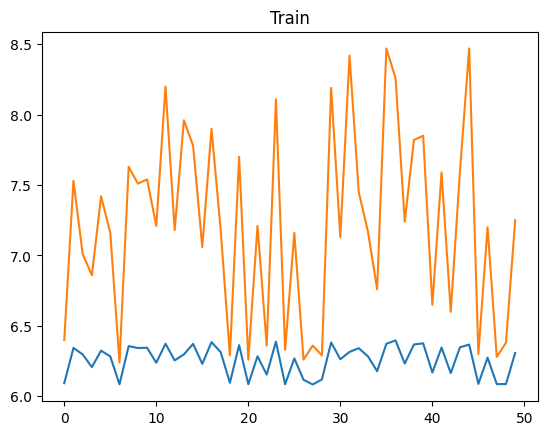

2/2 [==============================] - 0s 9ms/step


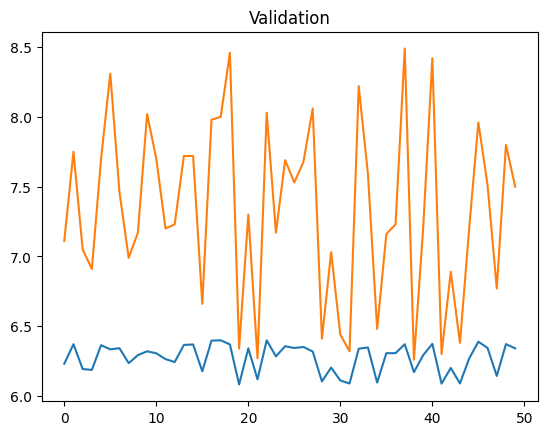

3/3 [==============================] - 0s 6ms/step


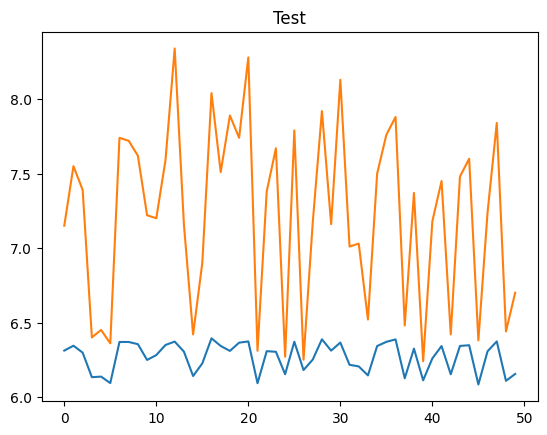

3/3 [==============================] - 0s 6ms/step


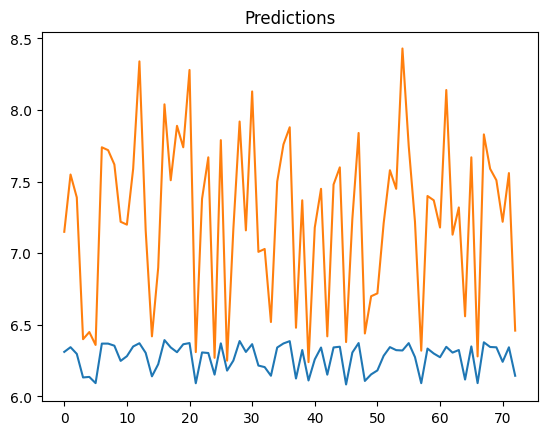

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_lstm_mse

1.1923404437716791

### RNN

Epoch 1/50
8/8 [==============================] - 3s 288ms/step - loss: 39.4694 - root_mean_squared_error: 6.2825 - val_loss: 35.3418 - val_root_mean_squared_error: 5.9449
Epoch 2/50
8/8 [==============================] - 2s 246ms/step - loss: 36.0642 - root_mean_squared_error: 6.0053 - val_loss: 31.2197 - val_root_mean_squared_error: 5.5875
Epoch 3/50
8/8 [==============================] - 2s 341ms/step - loss: 31.6775 - root_mean_squared_error: 5.6283 - val_loss: 27.4621 - val_root_mean_squared_error: 5.2404
Epoch 4/50
8/8 [==============================] - 2s 344ms/step - loss: 26.8430 - root_mean_squared_error: 5.1810 - val_loss: 24.0817 - val_root_mean_squared_error: 4.9073
Epoch 5/50
8/8 [==============================] - 3s 386ms/step - loss: 23.6452 - root_mean_squared_error: 4.8626 - val_loss: 21.0766 - val_root_mean_squared_error: 4.5909
Epoch 6/50
8/8 [==============================] - 2s 254ms/step - loss: 21.0586 - root_mean_squared_error: 4.5890 - val_loss: 18.3919 - val_

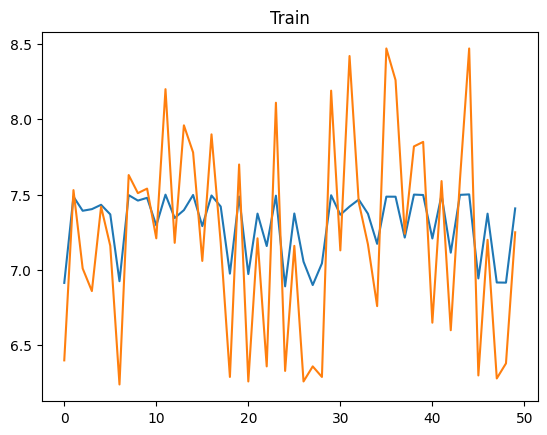

2/2 [==============================] - 0s 8ms/step


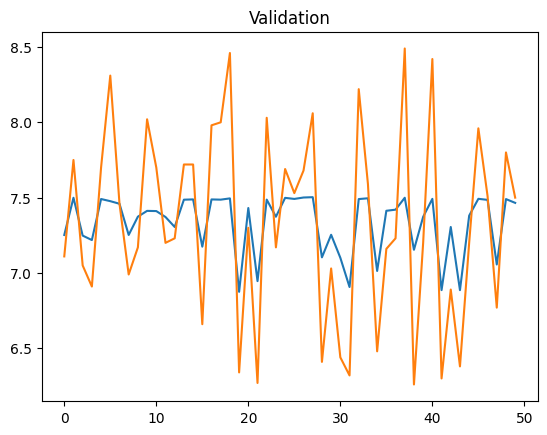

3/3 [==============================] - 0s 5ms/step


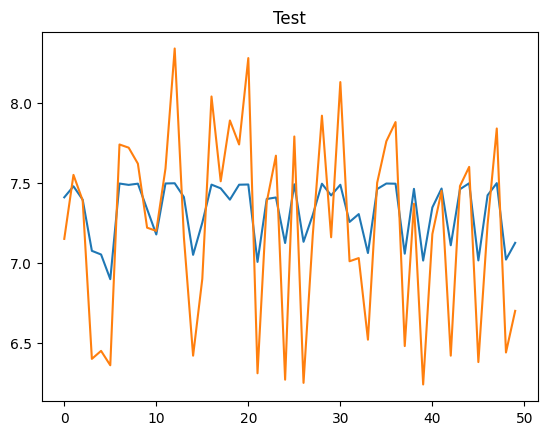

3/3 [==============================] - 0s 7ms/step


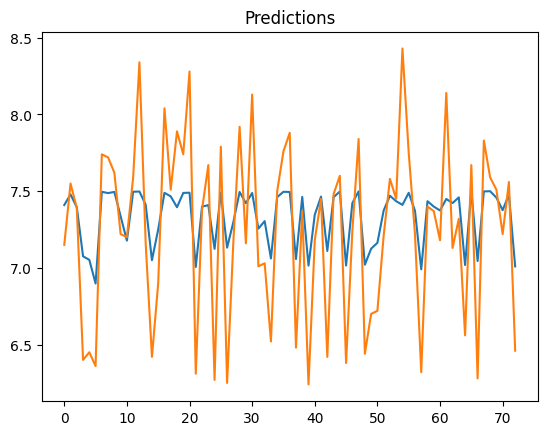

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
auto_rnn_mse

0.18606648553660418

# Moving Average with Encoder

### CNN

Epoch 1/50
8/8 [==============================] - 3s 190ms/step - loss: 122857.5000 - root_mean_squared_error: 350.5103 - val_loss: 40997.5859 - val_root_mean_squared_error: 202.4786
Epoch 2/50
8/8 [==============================] - 1s 161ms/step - loss: 65251.6250 - root_mean_squared_error: 255.4440 - val_loss: 7448.4429 - val_root_mean_squared_error: 86.3044
Epoch 3/50
8/8 [==============================] - 1s 182ms/step - loss: 29314.2734 - root_mean_squared_error: 171.2141 - val_loss: 5.7573 - val_root_mean_squared_error: 2.3994
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - loss: 22562.0918 - root_mean_squared_error: 150.2068 - val_loss: 1907.5854 - val_root_mean_squared_error: 43.6759
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 17338.2227 - root_mean_squared_error: 131.6747 - val_loss: 4704.0811 - val_root_mean_squared_error: 68.5863
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 13797.4160 - root_mean_squared_e

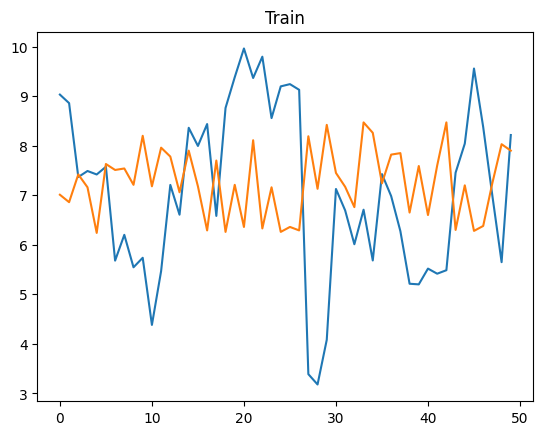

2/2 [==============================] - 0s 7ms/step


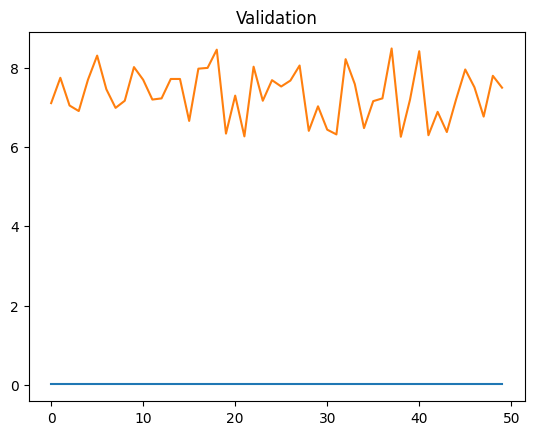

3/3 [==============================] - 0s 6ms/step


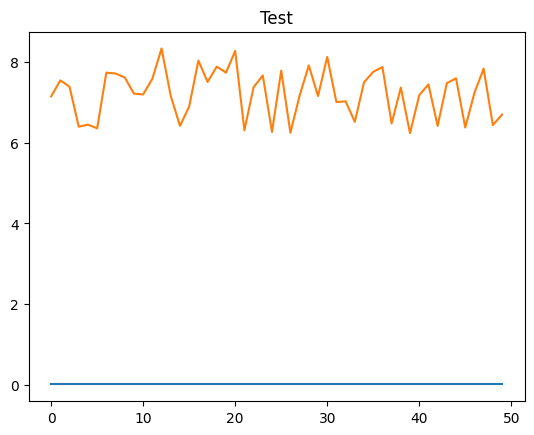

3/3 [==============================] - 0s 5ms/step


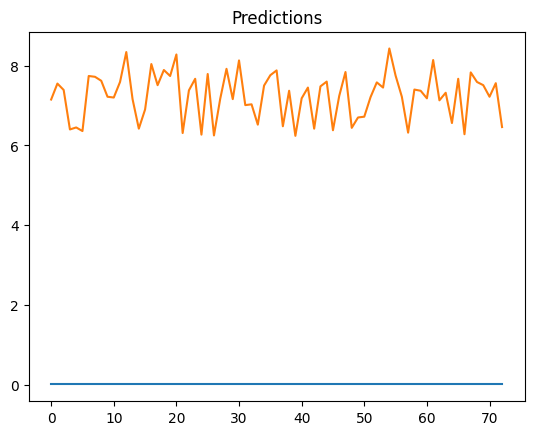

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_cnn_mse

52.79184752930022

### RNN

Epoch 1/50
8/8 [==============================] - 3s 296ms/step - loss: 65.4017 - root_mean_squared_error: 8.0871 - val_loss: 59.3933 - val_root_mean_squared_error: 7.7067
Epoch 2/50
8/8 [==============================] - 2s 275ms/step - loss: 56.6148 - root_mean_squared_error: 7.5243 - val_loss: 54.1020 - val_root_mean_squared_error: 7.3554
Epoch 3/50
8/8 [==============================] - 3s 382ms/step - loss: 53.8016 - root_mean_squared_error: 7.3350 - val_loss: 49.0782 - val_root_mean_squared_error: 7.0056
Epoch 4/50
8/8 [==============================] - 3s 384ms/step - loss: 48.7334 - root_mean_squared_error: 6.9809 - val_loss: 44.3546 - val_root_mean_squared_error: 6.6599
Epoch 5/50
8/8 [==============================] - 2s 257ms/step - loss: 44.3033 - root_mean_squared_error: 6.6561 - val_loss: 39.9367 - val_root_mean_squared_error: 6.3196
Epoch 6/50
8/8 [==============================] - 2s 262ms/step - loss: 39.4512 - root_mean_squared_error: 6.2810 - val_loss: 35.8339 - val_

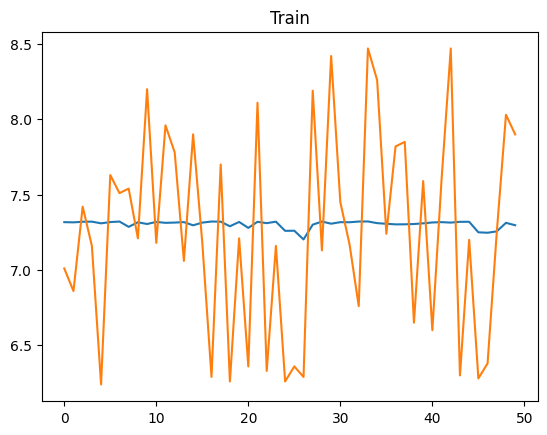

2/2 [==============================] - 0s 8ms/step


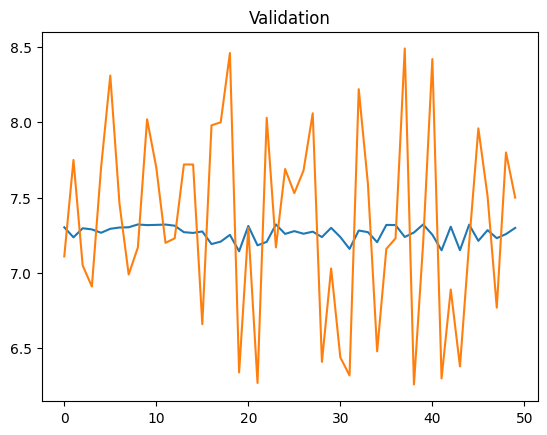

3/3 [==============================] - 0s 6ms/step


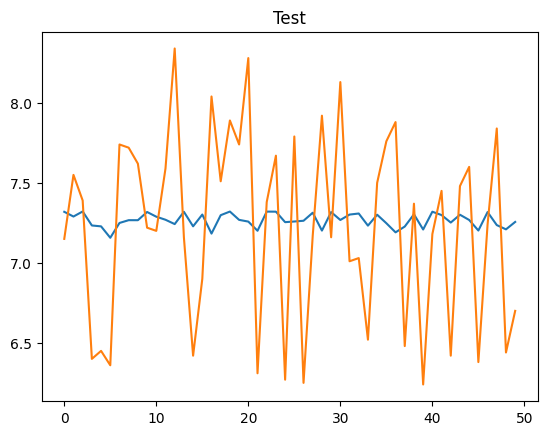

3/3 [==============================] - 0s 6ms/step


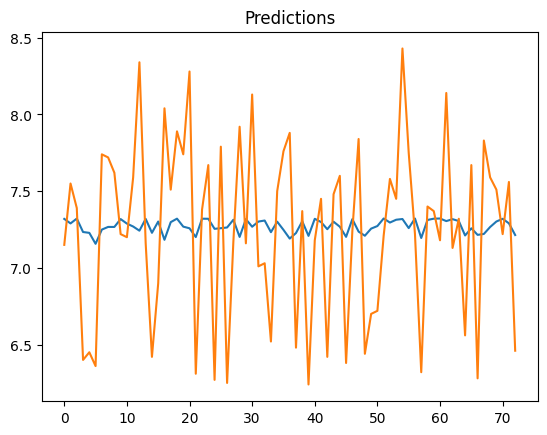

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_rnn_mse

### GRU

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_gru_mse

### LSTM

In [ ]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_auto_lstm_mse

0.818011117145776

# Hybrid

## General

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

Epoch 1/50
8/8 [==============================] - 10s 1s/step - loss: 49.6797 - root_mean_squared_error: 7.0484 - val_loss: 46.0329 - val_root_mean_squared_error: 6.7848
Epoch 2/50
8/8 [==============================] - 4s 606ms/step - loss: 44.8125 - root_mean_squared_error: 6.6942 - val_loss: 41.3691 - val_root_mean_squared_error: 6.4319
Epoch 3/50
8/8 [==============================] - 4s 600ms/step - loss: 40.2355 - root_mean_squared_error: 6.3431 - val_loss: 37.0191 - val_root_mean_squared_error: 6.0843
Epoch 4/50
8/8 [==============================] - 5s 750ms/step - loss: 35.9939 - root_mean_squared_error: 5.9995 - val_loss: 33.0101 - val_root_mean_squared_error: 5.7454
Epoch 5/50
8/8 [==============================] - 5s 775ms/step - loss: 32.0796 - root_mean_squared_error: 5.6639 - val_loss: 29.3692 - val_root_mean_squared_error: 5.4193
Epoch 6/50
8/8 [==============================] - 5s 690ms/step - loss: 28.5535 - root_mean_squared_error: 5.3435 - val_loss: 26.0804 - val_ro

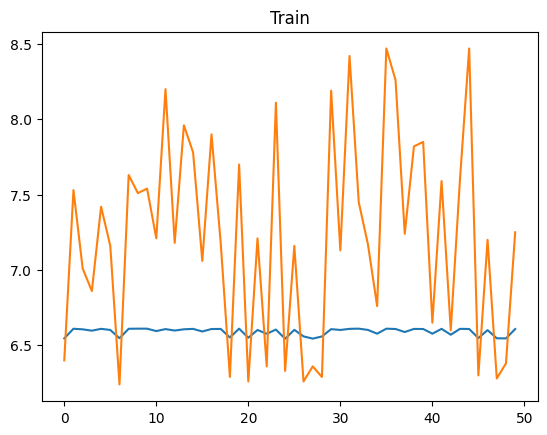

2/2 [==============================] - 1s 10ms/step


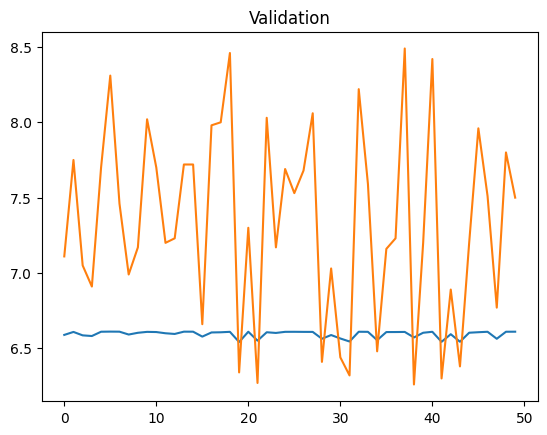

3/3 [==============================] - 0s 8ms/step


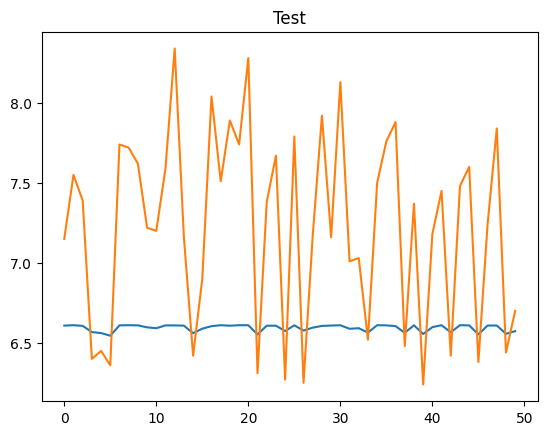

3/3 [==============================] - 0s 7ms/step


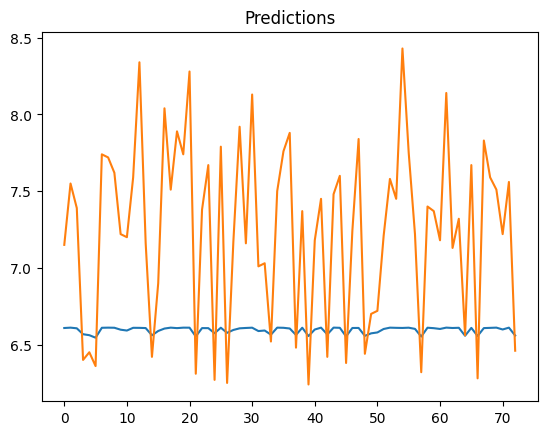

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

0.33547229993130745

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

Epoch 1/50
8/8 [==============================] - 13s 1s/step - loss: 54.7134 - root_mean_squared_error: 7.3969 - val_loss: 52.2013 - val_root_mean_squared_error: 7.2250
Epoch 2/50
8/8 [==============================] - 9s 1s/step - loss: 51.7884 - root_mean_squared_error: 7.1964 - val_loss: 48.6286 - val_root_mean_squared_error: 6.9734
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 48.1221 - root_mean_squared_error: 6.9370 - val_loss: 45.7484 - val_root_mean_squared_error: 6.7638
Epoch 4/50
8/8 [==============================] - 6s 910ms/step - loss: 45.7493 - root_mean_squared_error: 6.7638 - val_loss: 43.6017 - val_root_mean_squared_error: 6.6032
Epoch 5/50
8/8 [==============================] - 9s 1s/step - loss: 43.6175 - root_mean_squared_error: 6.6044 - val_loss: 41.5397 - val_root_mean_squared_error: 6.4451
Epoch 6/50
8/8 [==============================] - 7s 931ms/step - loss: 41.5666 - root_mean_squared_error: 6.4472 - val_loss: 39.7058 - val_root_mean_s

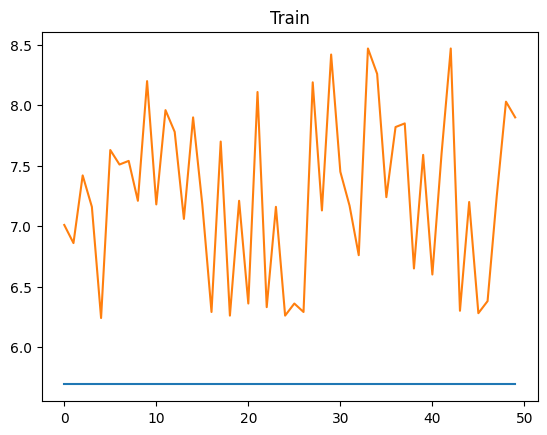

2/2 [==============================] - 1s 12ms/step


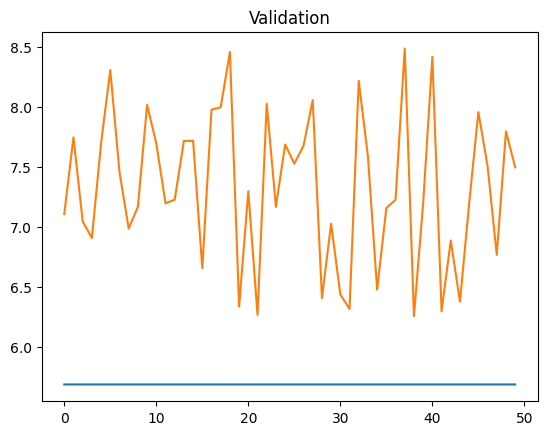

3/3 [==============================] - 0s 8ms/step


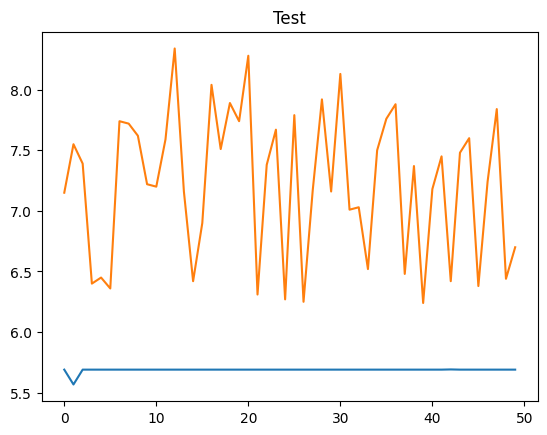

3/3 [==============================] - 0s 8ms/step


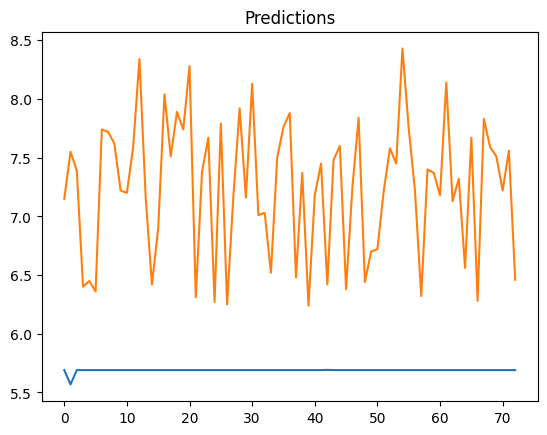

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

<Axes: xlabel='Model'>

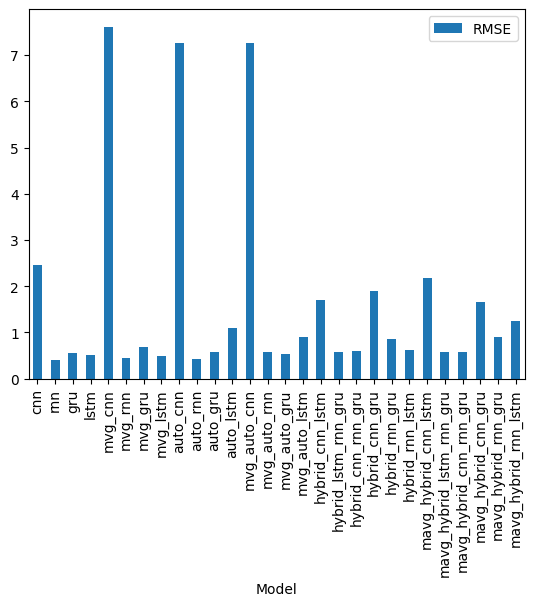

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")